In [3]:
#Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt #for visualization 


import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory


#Read the dataset
data_df = pd.read_csv("customer_churn_large_dataset.csv",na_values=['id'])

#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(data_df, 'Overview of the dataset')



Overview of the dataset:n
Number of rows:  100000
nNumber of features: 9
nData Features:
['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
nMissing values: 0
nUnique values:
CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64


In [4]:
data_df.sample(4)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
15196,15197,Customer_15197,68,Female,Miami,8,42.55,394,0
19783,19784,Customer_19784,36,Male,Miami,8,58.43,438,1
84985,84986,Customer_84986,28,Male,Chicago,10,56.50,98,1
84171,84172,Customer_84172,56,Female,New York,24,91.35,430,0


In [ ]:
data_df.drop('CustomerID',axis='columns',inplace=True)
data_df.drop('Name',axis='columns',inplace=True)

In [8]:
data_df.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [9]:
data_df.Gender.values

array(['Male', 'Female', 'Female', ..., 'Male', 'Female', 'Female'],
      dtype=object)

In [12]:
data_df[pd.to_numeric(data_df.Subscription_Length_Months,errors='coerce').isnull()]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [14]:
data_df[pd.to_numeric(data_df.Monthly_Bill,errors='coerce').isnull()]


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


In [22]:
data_df[pd.to_numeric(data_df.Total_Usage_GB).isnull()]

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


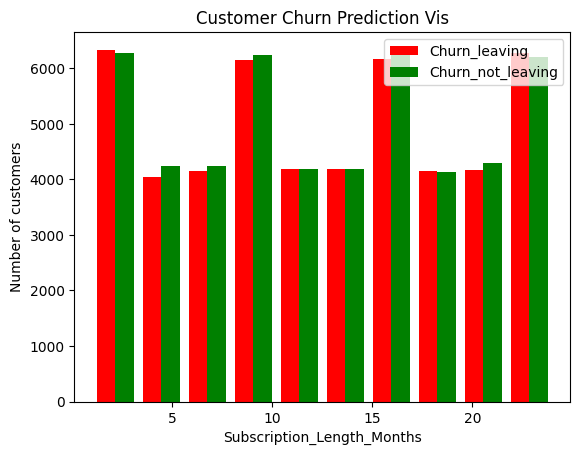

In [33]:
Churn_leaving=data_df[data_df.Churn==1].Subscription_Length_Months
Churn_not_leaving=data_df[data_df.Churn==0].Subscription_Length_Months

plt.xlabel("Subscription_Length_Months")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Vis")

plt.hist([Churn_leaving,Churn_not_leaving],color=['red','green'],label=["Churn_leaving",'Churn_not_leaving'])
plt.legend()

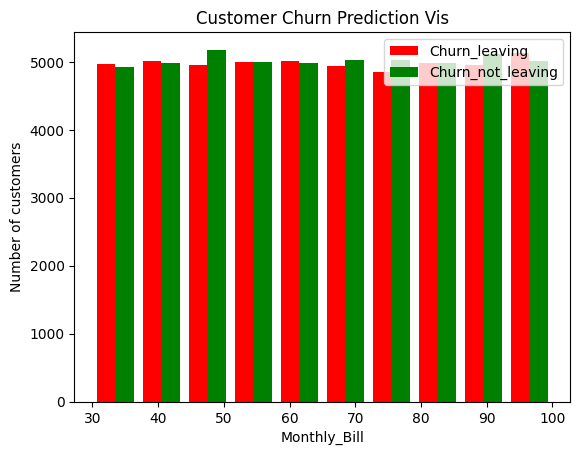

In [34]:
Churn_leaving=data_df[data_df.Churn==1].Monthly_Bill
Churn_not_leaving=data_df[data_df.Churn==0].Monthly_Bill
plt.xlabel("Monthly_Bill")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Vis")

plt.hist([Churn_leaving,Churn_not_leaving],color=['red','green'],label=["Churn_leaving",'Churn_not_leaving'])
plt.legend()

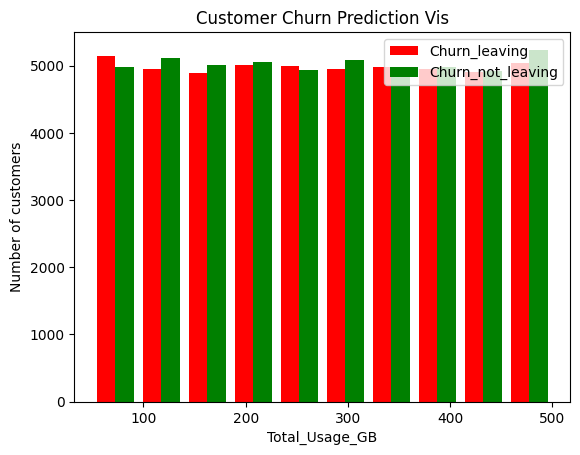

In [39]:
Churn_leaving=data_df[data_df.Churn==1].Total_Usage_GB
Churn_not_leaving=data_df[data_df.Churn==0].Total_Usage_GB
plt.xlabel("Total_Usage_GB")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Vis")

plt.hist([Churn_leaving,Churn_not_leaving],color=['red','green'],label=["Churn_leaving",'Churn_not_leaving'])
plt.legend()

In [42]:
#feature engneering

def print_unique_col_values(df):
    for column in data_df:
        if data_df[column].dtypes=='object':
            print(f'{column}:{data_df[column].unique()}')

In [44]:
print_unique_col_values(data_df)

Gender:['Male' 'Female']
Location:['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [45]:
data_df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [46]:
data_df['Gender'].unique()

array([0, 1], dtype=int64)

In [48]:
#one hot encoding


df2=pd.get_dummies(data=data_df,columns=['Location'])
df2.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York'],
      dtype='object')

In [52]:
df2.sample(4)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
38269,59,0,4,96.79,425,1,0,0,0,0,1
3810,59,0,12,70.22,205,1,0,0,0,0,1
43413,65,0,15,88.48,485,0,0,0,0,1,0
20581,28,1,18,53.92,134,0,0,0,1,0,0


In [53]:
df2.dtypes

Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Location_Chicago                uint8
Location_Houston                uint8
Location_Los Angeles            uint8
Location_Miami                  uint8
Location_New York               uint8
dtype: object

In [54]:
#feature scaling

cols_to_scale=['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [55]:
df2.sample(4)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
66973,47,0,0.391304,0.565286,0.420000,1,0,1,0,0,0
14872,27,0,0.826087,0.982429,0.491111,0,0,0,1,0,0
12621,43,1,0.913043,0.512143,0.706667,0,0,0,0,1,0
46043,34,1,0.434783,0.572857,0.082222,1,0,0,0,1,0


In [56]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [57]:
#splitting test train datasets


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [59]:
X_train.shape

(80000, 10)

In [62]:
X_test.shape

(20000, 10)

In [63]:
X_train[:10]

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
46628,33,0,0.652174,0.100571,0.264444,0,0,1,0,0
92846,41,0,0.304348,0.797429,0.075556,0,0,0,1,0
30440,41,1,0.565217,0.681429,0.771111,0,1,0,0,0
79978,22,0,0.478261,0.547000,0.288889,0,0,0,1,0
85038,30,0,0.739130,0.817857,1.000000,0,0,1,0,0
48616,56,0,0.043478,0.319429,0.813333,0,0,0,0,1
77987,59,1,0.173913,0.669286,0.622222,0,0,0,1,0
61879,39,0,0.130435,0.129429,0.784444,0,0,0,0,1
86215,25,1,0.565217,0.574000,0.688889,0,0,0,1,0
38620,64,0,0.173913,0.543571,0.946667,0,0,0,1,0


In [64]:
len(X_train.columns)

10

In [82]:
#model_building

import tensorflow as tf
from tensorflow import keras


model=keras.Sequential([
    keras.layers.Dense(10, input_dim=(10), activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6941 - accuracy: 0.5002
Epoch 2/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6931 - accuracy: 0.5021
Epoch 3/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.4997
Epoch 4/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5024
Epoch 5/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 6/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5031
Epoch 7/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5027
Epoch 8/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5015
Epoch 9/100
2500/2500 [==============================] - 3s 1ms/step - loss: 0.6932 - accuracy: 0.5026
Epoch 10/100
2500/2500 [==============================] - 3s 1ms/step - l

In [99]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 1s 999us/step - loss: 0.6932 - accuracy: 0.4975


[0.6931822299957275, 0.4975000023841858]

In [100]:
yp=model.predict(X_test)
yp[:5]

 50/625 [=>............................] - ETA: 0s 

625/625 [==============================] - 1s 905us/step


array([[0.4975702],
       [0.4975702],
       [0.4975702],
       [0.4975702],
       [0.4975702]], dtype=float32)

In [101]:
y_test[:5]

60743    1
33949    1
52805    1
11804    1
9229     1
Name: Churn, dtype: int64

In [107]:
y_pred=[]
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [109]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      9950
           1       0.00      0.00      0.00     10050

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000



c:\Users\sidha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sidha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sidha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [130]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.4988
precision:  0.5021746403479425
recall:  0.29870646766169157
f1_score:  0.47770184548140376


In [131]:
#optimization_of_features

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

In [132]:
X_rfe = X.iloc[:, rfecv.support_]

c:\Users\sidha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


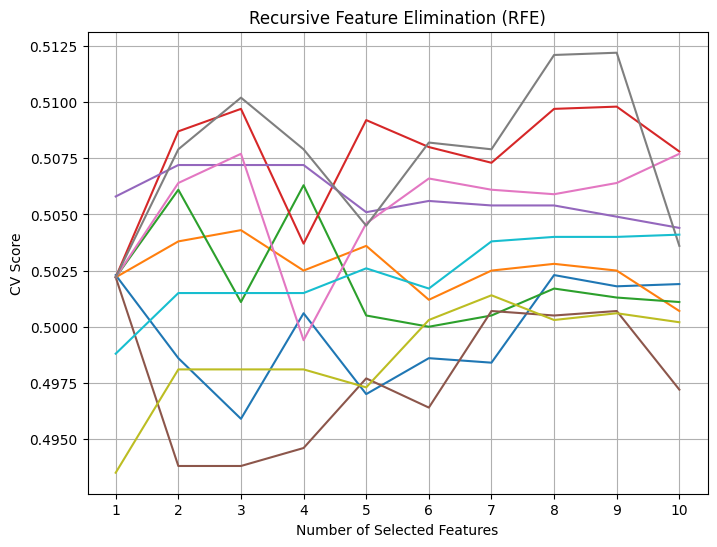

The optimal number of features: 8


In [133]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [134]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]


In [135]:
# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.4988
precision:  0.5021746403479425
recall:  0.29870646766169157
f1_score:  0.47770184548140376


In [136]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.49575
precision:  0.49815069216950225
recall:  0.4690547263681592
f1_score:  0.4953894125914872


In [ ]:
##Hyperparameter tuning
# define model
model = LogisticRegression()

# define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 1000)

# define search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_rfe, y)
# summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)
params = result.best_params_

#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)